### Exploratory Data Analysis for the NFL Prediction Project

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [38]:
# Determine proper path
current_dir = Path.cwd()
if 'notebooks' in str(current_dir):
    project_root = current_dir.parent
else:
    project_root = current_dir

# Load CSV
data_path = project_root / 'data' / 'raw' / 'nfl_team_stats.csv'
df = pd.read_csv(data_path)

In [39]:
# Check for proper loading of CSV
print(f"Shape: {df.shape}")
print(df.head())

Shape: (320, 22)
   season team  epa_per_play_offense  total_yards_offense  pass_attempts  \
0    2015  ARI              0.059187               7190.0          677.0   
1    2015  ATL             -0.015871               5987.0          655.0   
2    2015  BAL             -0.042881               5751.0          703.0   
3    2015  BUF              0.011406               5779.0          509.0   
4    2015  CAR              0.047779               6959.0          635.0   

   rush_attempts  success_rate_offense  fumbles_lost_offense  \
0          488.0              0.461840                  14.0   
1          421.0              0.457455                  13.0   
2          384.0              0.443972                   6.0   
3          512.0              0.407489                   9.0   
4          631.0              0.452568                  14.0   

   interceptions_thrown  epa_per_play_defense  ...  fumbles_forced  \
0                  19.0             -0.050755  ...            14.0   
1

In [40]:
# Check for missing values
print(df.isnull().sum())

season                    0
team                      0
epa_per_play_offense      0
total_yards_offense       0
pass_attempts             0
rush_attempts             0
success_rate_offense      0
fumbles_lost_offense      0
interceptions_thrown      0
epa_per_play_defense      0
total_yards_defense       0
success_rate_defense      0
fumbles_forced            0
interceptions_caught      0
wins                      8
losses                    8
games_played              8
yards_per_game_offense    8
yards_per_game_defense    8
turnovers_lost            0
turnovers_gained          0
turnover_differential     0
dtype: int64


In [41]:
# Check data types
print(df.dtypes)

season                      int64
team                       object
epa_per_play_offense      float64
total_yards_offense       float64
pass_attempts             float64
rush_attempts             float64
success_rate_offense      float64
fumbles_lost_offense      float64
interceptions_thrown      float64
epa_per_play_defense      float64
total_yards_defense       float64
success_rate_defense      float64
fumbles_forced            float64
interceptions_caught      float64
wins                      float64
losses                    float64
games_played              float64
yards_per_game_offense    float64
yards_per_game_defense    float64
turnovers_lost            float64
turnovers_gained          float64
turnover_differential     float64
dtype: object


In [42]:
df.describe()

,season,epa_per_play_offense,total_yards_offense,pass_attempts,rush_attempts,success_rate_offense,fumbles_lost_offense,interceptions_thrown,epa_per_play_defense,total_yards_defense,...,fumbles_forced,interceptions_caught,wins,losses,games_played,yards_per_game_offense,yards_per_game_defense,turnovers_lost,turnovers_gained,turnover_differential
count,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,312.000000,312.000000,312.000000,312.000000,312.000000,320.000000,320.000000,320.000000
mean,2019.50000,-0.012702,5920.068750,634.493750,456.815625,0.433653,9.212500,13.612500,-0.009170,5920.068750,...,9.212500,13.612500,8.596154,8.516026,17.112179,345.806297,346.865398,22.825000,22.825000,0.000000
std,2.87678,0.067541,839.747593,68.657936,68.804027,0.031659,3.011759,4.354204,0.050911,530.523922,...,3.228765,4.587686,3.634028,2.798668,1.238547,35.533249,30.600898,5.534786,6.285326,8.875665
min,2015.00000,-0.212377,3869.000000,440.000000,334.000000,0.349876,3.000000,4.000000,-0.177577,4640.000000,...,2.000000,2.000000,0.000000,2.000000,15.000000,241.812500,275.055556,9.000000,8.000000,-24.000000
25%,2017.00000,-0.058770,5311.000000,585.750000,407.000000,0.409198,7.000000,11.000000,-0.044509,5550.750000,...,7.000000,10.000000,6.000000,7.000000,16.000000,321.375000,325.315625,19.000000,18.000000,-5.000000
50%,2019.50000,-0.010810,5778.500000,631.500000,448.500000,0.434148,9.000000,13.000000,-0.008771,5910.000000,...,9.000000,13.000000,8.000000,8.000000,17.000000,347.588235,344.559028,23.000000,23.000000,0.000000
75%,2022.00000,0.031948,6454.000000,674.250000,497.250000,0.453682,11.000000,16.000000,0.025262,6279.750000,...,11.000000,17.000000,11.000000,10.000000,18.000000,370.331597,367.483456,26.000000,27.000000,6.000000
max,2024.00000,0.173506,8155.000000,853.000000,776.000000,0.534000,18.000000,30.000000,0.121386,7396.000000,...,21.000000,31.000000,18.000000,16.000000,21.000000,431.750000,428.800000,41.000000,48.000000,26.000000


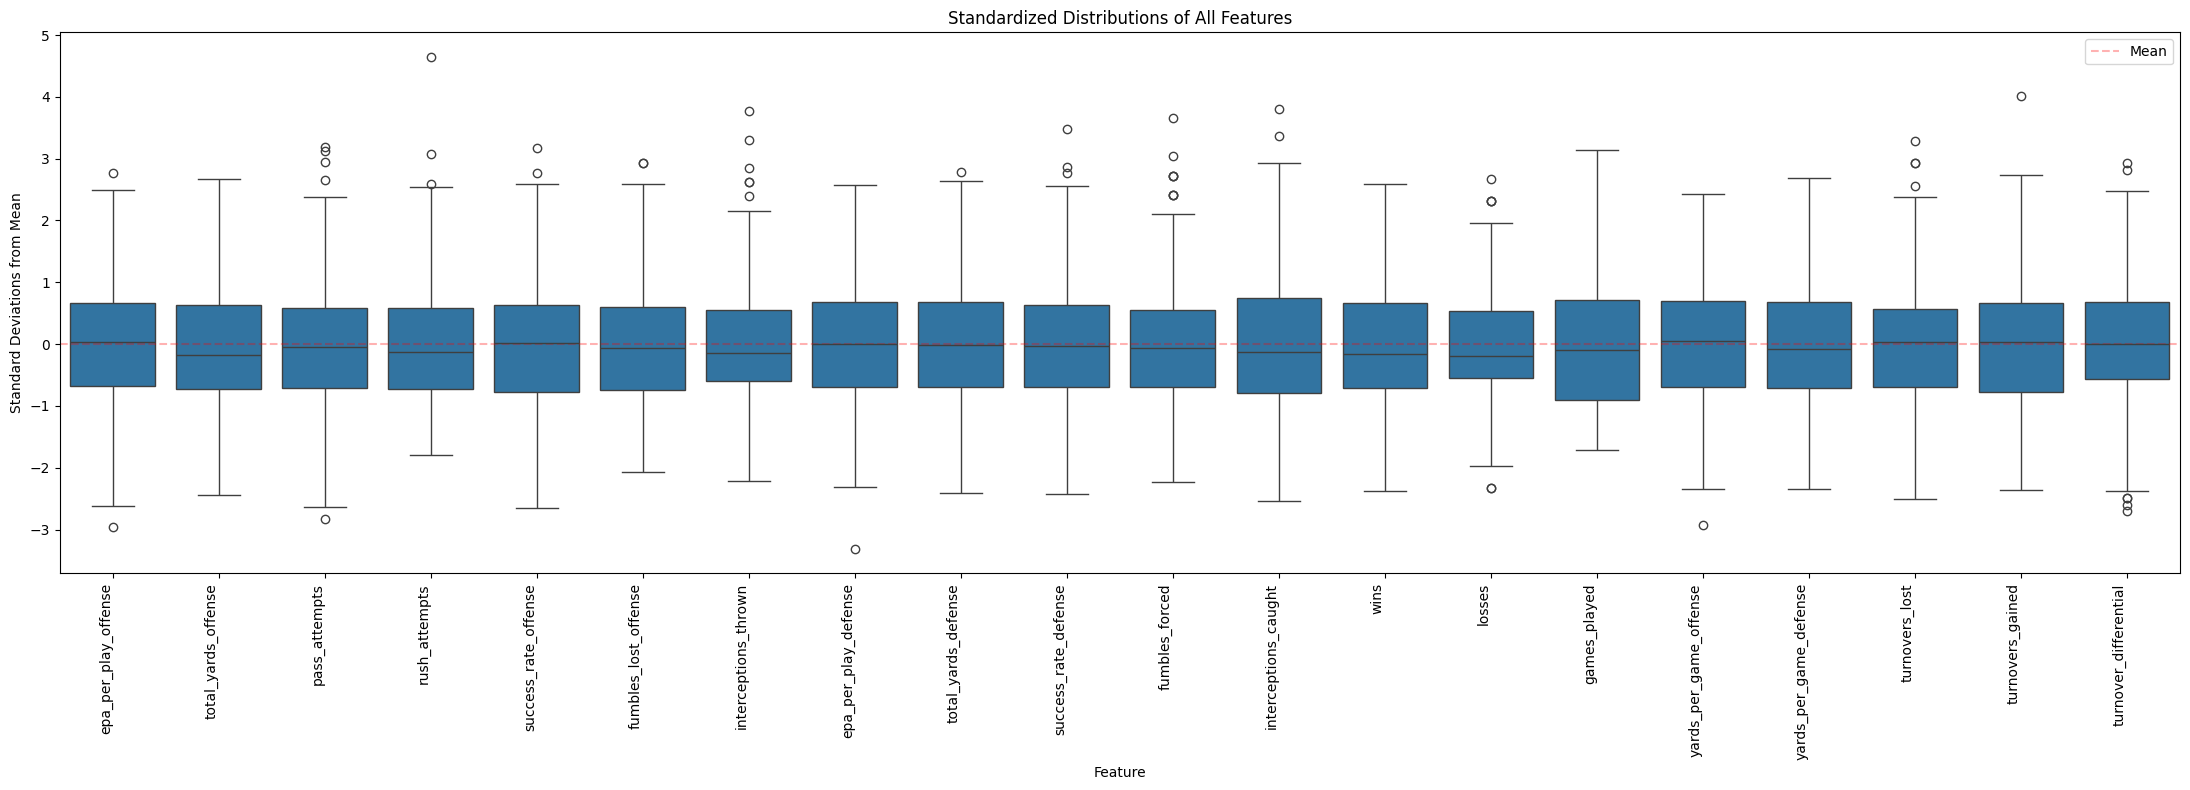

In [43]:
from sklearn.preprocessing import StandardScaler

# Get all numeric columns except season
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('season')

# Standardize all features (mean=0, std=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]), 
    columns=numeric_cols
)

# Create melted dataframe for seaborn
df_melted = df_scaled.melt(var_name='Feature', value_name='Standardized Value')

# Plot
plt.figure(figsize=(22, 8))
sns.boxplot(data=df_melted, x='Feature', y='Standardized Value')
plt.xticks(rotation=90, ha='right')
plt.title('Standardized Distributions of All Features')
plt.ylabel('Standard Deviations from Mean')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3, label='Mean')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Transform cummulative stats to per game stats
df_per_game = df.copy()

# Calculate per-game stats for cumulative features
df_per_game['pass_attempts_per_game'] = df_per_game['pass_attempts'] / df_per_game['games_played']
df_per_game['rush_attempts_per_game'] = df_per_game['rush_attempts'] / df_per_game['games_played']
df_per_game['fumbles_lost_per_game'] = df_per_game['fumbles_lost_offense'] / df_per_game['games_played']
df_per_game['interceptions_thrown_per_game'] = df_per_game['interceptions_thrown'] / df_per_game['games_played']
df_per_game['fumbles_forced_per_game'] = df_per_game['fumbles_forced'] / df_per_game['games_played']
df_per_game['interceptions_caught_per_game'] = df_per_game['interceptions_caught'] / df_per_game['games_played']
df_per_game['turnovers_lost_per_game'] = df_per_game['turnovers_lost'] / df_per_game['games_played']
df_per_game['turnovers_gained_per_game'] = df_per_game['turnovers_gained'] / df_per_game['games_played']
df_per_game['turnover_differential_per_game'] = df_per_game['turnover_differential'] / df_per_game['games_played']

# Win percentage (target variable)
df_per_game['win_percentage'] = df_per_game['wins'] / df_per_game['games_played']

# Drop the cumulative versions (keep per-game only)
cols_to_drop = [
    'total_yards_offense', 'total_yards_defense',  # Already have yards_per_game
    'pass_attempts', 'rush_attempts',
    'fumbles_lost_offense', 'interceptions_thrown',
    'fumbles_forced', 'interceptions_caught',
    'turnovers_lost', 'turnovers_gained', 'turnover_differential',
    'wins', 'losses', 'games_played'  # Keep season and team
]

df_per_game = df_per_game.drop(columns=cols_to_drop)

print(f"New shape: {df_per_game.shape}")
print(f"\nColumns:\n{df_per_game.columns.tolist()}")
df_per_game.head()

New shape: (320, 18)

Columns:
['season', 'team', 'epa_per_play_offense', 'success_rate_offense', 'epa_per_play_defense', 'success_rate_defense', 'yards_per_game_offense', 'yards_per_game_defense', 'pass_attempts_per_game', 'rush_attempts_per_game', 'fumbles_lost_per_game', 'interceptions_thrown_per_game', 'fumbles_forced_per_game', 'interceptions_caught_per_game', 'turnovers_lost_per_game', 'turnovers_gained_per_game', 'turnover_differential_per_game', 'win_percentage']


,season,team,epa_per_play_offense,success_rate_offense,epa_per_play_defense,success_rate_defense,yards_per_game_offense,yards_per_game_defense,pass_attempts_per_game,rush_attempts_per_game,fumbles_lost_per_game,interceptions_thrown_per_game,fumbles_forced_per_game,interceptions_caught_per_game,turnovers_lost_per_game,turnovers_gained_per_game,turnover_differential_per_game,win_percentage
0,2015,ARI,0.059187,0.461840,-0.050755,0.413932,399.444444,334.166667,37.611111,27.111111,0.777778,1.055556,0.777778,1.166667,1.833333,1.944444,0.111111,0.777778
1,2015,ATL,-0.015871,0.457455,-0.009479,0.440744,374.187500,347.625000,40.937500,26.312500,0.812500,1.062500,0.500000,0.937500,1.875000,1.437500,-0.437500,0.500000
2,2015,BAL,-0.042881,0.443972,0.014549,0.409665,359.437500,337.625000,43.937500,24.000000,0.375000,1.312500,0.562500,0.375000,1.687500,0.937500,-0.750000,0.312500
3,2015,BUF,0.011406,0.407489,-0.001580,0.426289,361.187500,356.875000,31.812500,32.000000,0.562500,0.562500,0.562500,1.062500,1.125000,1.625000,0.500000,0.500000
4,2015,CAR,0.047779,0.452568,-0.101334,0.398758,366.263158,319.000000,33.421053,33.210526,0.736842,0.631579,0.894737,1.631579,1.368421,2.526316,1.157895,0.894737


In [51]:
# Select only numeric columns (exclude 'team')
numeric_df = df_per_game.select_dtypes(include=['float64', 'int64'])

In [52]:
print("NaN counts in numeric columns:")
print(numeric_df.isnull().sum())

NaN counts in numeric columns:
season                            0
epa_per_play_offense              0
success_rate_offense              0
epa_per_play_defense              0
success_rate_defense              0
yards_per_game_offense            8
yards_per_game_defense            8
pass_attempts_per_game            8
rush_attempts_per_game            8
fumbles_lost_per_game             8
interceptions_thrown_per_game     8
fumbles_forced_per_game           8
interceptions_caught_per_game     8
turnovers_lost_per_game           8
turnovers_gained_per_game         8
turnover_differential_per_game    8
win_percentage                    8
dtype: int64


In [53]:
# Find rows with NaN values
nan_rows = df_per_game[df_per_game['win_percentage'].isna()]
print(f"Teams with NaN values:\n")
print(nan_rows[['season', 'team']])

Teams with NaN values:

     season team
16     2015   LA
17     2015  LAC
18     2015   LV
49     2016  LAC
50     2016   LV
82     2017   LV
114    2018   LV
146    2019   LV


In [54]:
# 1. Clean the data first
df_per_game_clean = df_per_game.dropna()

print(f"Shape before: {df_per_game.shape}")
print(f"Shape after: {df_per_game_clean.shape}")

# 2. Select numeric columns
numeric_df_clean = df_per_game_clean.select_dtypes(include=['float64', 'int64'])

# 3. Recalculate correlations with clean data
correlations_clean = numeric_df_clean.corr()['win_percentage'].sort_values(ascending=False)

print("\nCorrelations with Win Percentage (Clean Data):")
print("="*50)
print(correlations_clean)


Shape before: (320, 18)
Shape after: (312, 18)

Correlations with Win Percentage (Clean Data):
win_percentage                    1.000000
epa_per_play_offense              0.712095
turnover_differential_per_game    0.650136
success_rate_offense              0.588191
yards_per_game_offense            0.558128
turnovers_gained_per_game         0.501775
interceptions_caught_per_game     0.472873
rush_attempts_per_game            0.389192
fumbles_forced_per_game           0.272622
season                           -0.014396
pass_attempts_per_game           -0.138841
fumbles_lost_per_game            -0.261877
success_rate_defense             -0.309592
yards_per_game_defense           -0.368203
interceptions_thrown_per_game    -0.452066
turnovers_lost_per_game          -0.484617
epa_per_play_defense             -0.487630
Name: win_percentage, dtype: float64


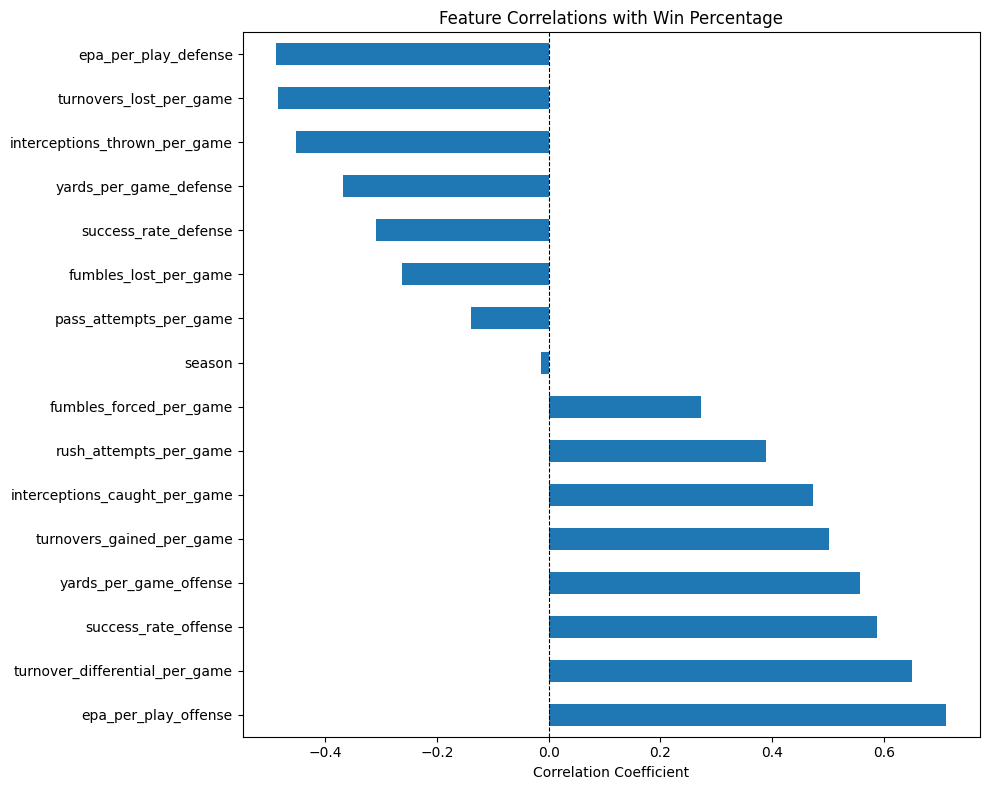

In [55]:
# Visualize with a bar plot
plt.figure(figsize=(10, 8))
correlations_clean.drop('win_percentage').plot(kind='barh')  # Drop win_percentage itself (correlation = 1.0)
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlations with Win Percentage')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

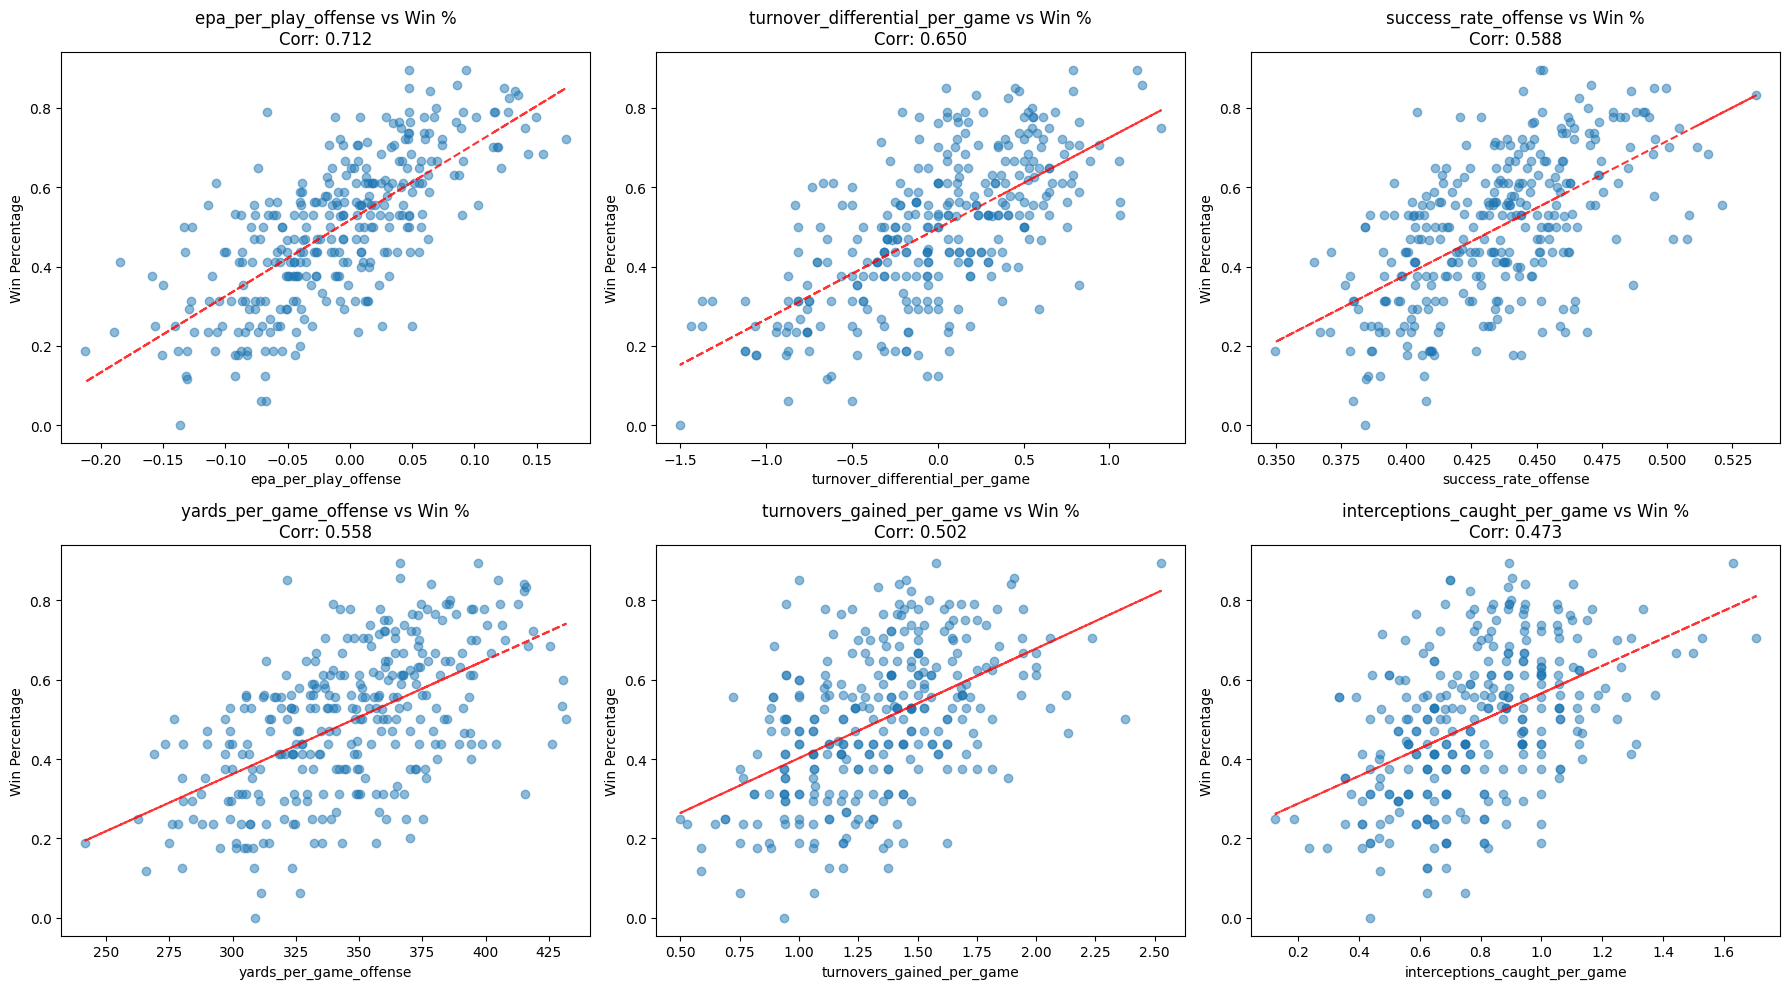

In [56]:
# Get top 6 correlations (excluding win_percentage itself and season)
top_features = correlations_clean.drop(['win_percentage', 'season']).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(numeric_df_clean[feature], numeric_df_clean['win_percentage'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Win Percentage')
    axes[i].set_title(f'{feature} vs Win %\nCorr: {correlations_clean[feature]:.3f}')
    
    # Add trend line
    z = np.polyfit(numeric_df_clean[feature], numeric_df_clean['win_percentage'], 1)
    p = np.poly1d(z)
    axes[i].plot(numeric_df_clean[feature], p(numeric_df_clean[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

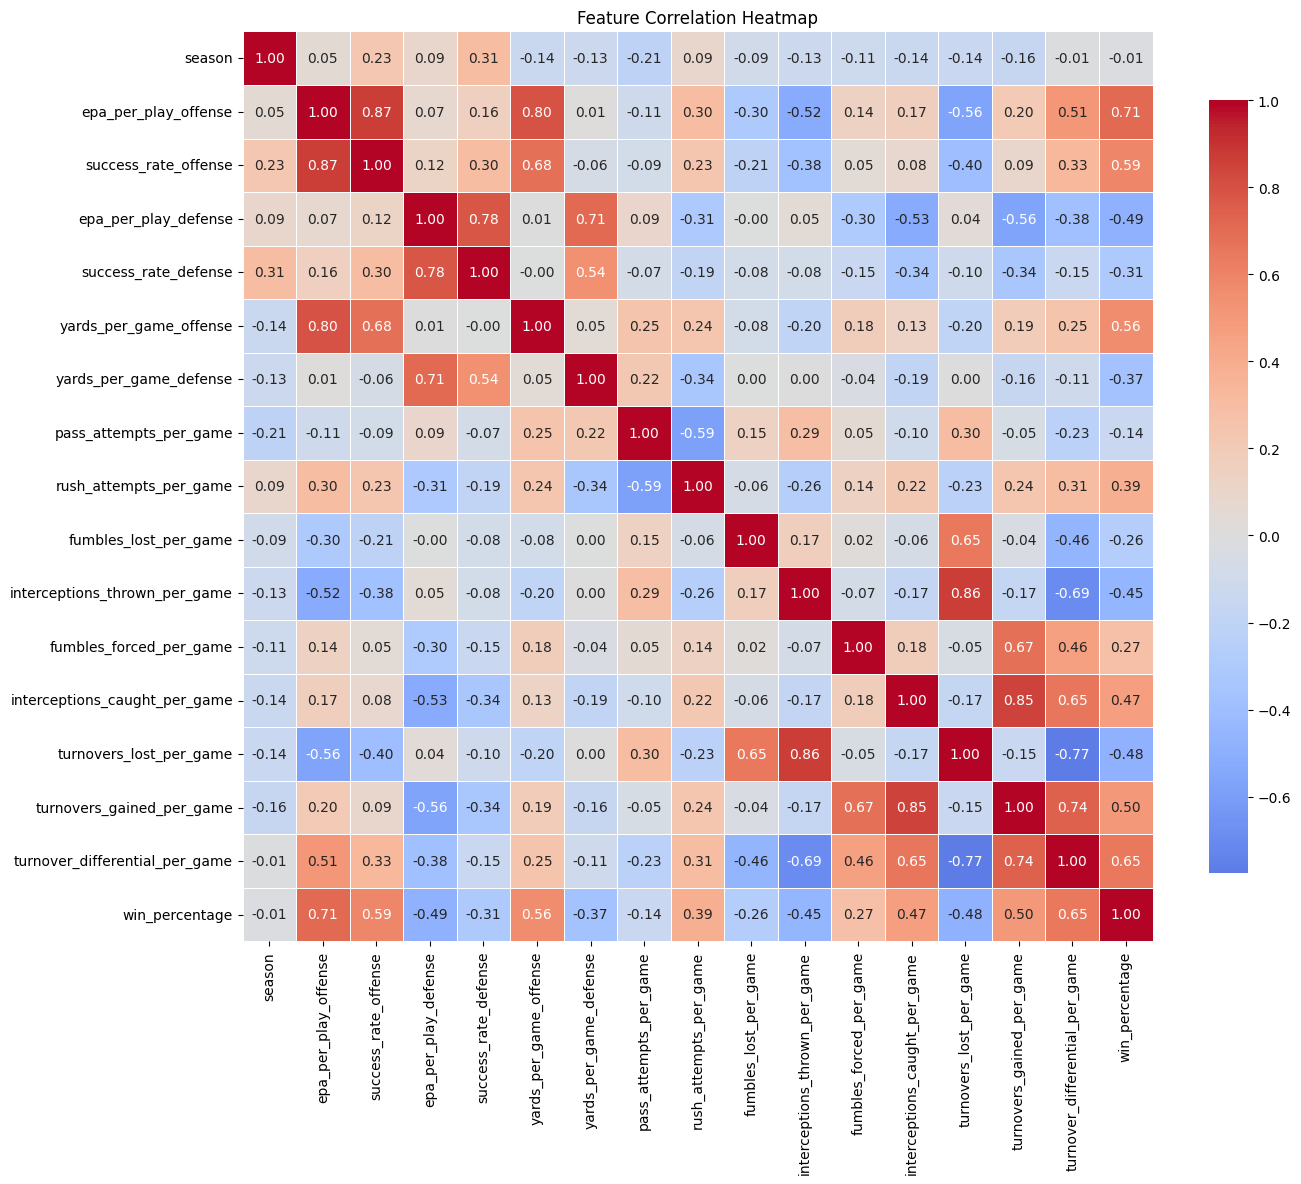

In [57]:
# Create correlation heatmap for all features
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df_clean.corr(), 
            annot=True,  # Show correlation values
            fmt='.2f',   # 2 decimal places
            cmap='coolwarm',  # Red = positive, Blue = negative
            center=0,    # White at 0
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Key correlations:

1. Partial --> Full statistics (EX: fumbles --> turnovers)

2. Component --> Differential (EX: turnovers gained --> turnover differential)

3. Success Rate <--> EPA <--> Yards per game

# Plan: Train 3 models & compare performance

1. Simple, 3 most important features

2. Moderate, 6 most important features

3. Complex, all features with Ridge regression

In [61]:
# Set path to root/data/processed/
processed_dir = Path('../data/processed')
processed_dir.mkdir(parents=True, exist_ok=True)

# Save the CSV
df_per_game_clean.to_csv('../data/processed/nfl_features_clean.csv', index=False)

print("✓ Data saved to data/processed/nfl_features_clean.csv")
print(f"Shape: {df_per_game_clean.shape}")


✓ Data saved to data/processed/nfl_features_clean.csv
Shape: (312, 18)
